In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import momepy
import geopandas as gpd
import pandas as pd
import pickle as pkl
import numpy as np

In [2]:
mapa = gpd.read_file("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/rawdata/Censo 2010 (Municipal)/inegi_refcenmuni_2010.shp", 
                    encoding = 'latin')

In [3]:
with open("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/rawdata/regiones.pkl", "rb") as file:
    regiones = pkl.load(file)

In [4]:
zmvm = []
for value in regiones.values():
    zmvm.extend(value)

In [6]:
with open("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/rawdata/cve_umun.pkl", "wb") as handle:
    pkl.dump(zmvm, handle, protocol=pkl.HIGHEST_PROTOCOL)

In [7]:
mapa = mapa[mapa.cve_umun.isin(zmvm)]

In [8]:
mapa = mapa.iloc[mapa['nom_mun'].str.normalize('NFKD').argsort()]

# remove accents
mapa['nom_mun'] = mapa['nom_mun'].str.normalize('NFKD')\
             .str.encode('ascii', errors='ignore')\
             .str.decode('utf-8')

In [9]:
mapa = mapa.sort_values(by='nom_mun')

In [10]:
geometry = mapa.geometry

In [11]:
# obtenemos el centroide de la región
centros = geometry.to_crs(epsg=4087).centroid

In [12]:
P = lambda p: (p.x, p.y)

In [13]:
lats = centros.map(P).to_numpy()

In [14]:
pos = {}
for i in range(47):
    pos[mapa.iloc[i, 3]] = lats[i]

In [15]:
data = pd.read_csv("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/cleandata/viajes/viajes_entre_semana_por_cve_umun_2017.csv",
                  index_col = 0)

In [18]:
for i in range(47):
    data.iloc[i, i] = 0
    
data

,09002,09003,09004,09005,09006,09007,09008,09009,09010,09011,...,15092,15095,15099,15100,15104,15108,15109,15120,15121,15122
origen,,,,,,,,,,,,,,,,,,,,,
9002,0,9641,1475,48174,2656,10111,1250,0,6859,760,...,1139,673,717,260,34492,2735,9656,342,5189,1341
9003,8933,0,7375,22401,15553,144530,70868,5700,54709,19709,...,374,97,948,343,6693,773,1699,856,1578,2356
9004,1449,6857,0,3168,1382,4649,3222,157,38313,303,...,0,0,0,104,1941,430,56,0,665,549
9005,47059,22409,3148,0,7677,22120,2170,249,8153,2338,...,3103,1106,1711,598,63540,1773,5511,781,6844,2463
9006,2520,16564,1252,7368,0,115495,1729,522,5255,4493,...,509,0,240,0,1431,227,873,178,644,2758
9007,9732,142445,4658,23556,115752,0,9613,5001,15371,61682,...,767,0,2816,97,2904,256,1520,0,1783,11465
9008,1250,71705,3291,2060,1728,9684,0,412,32461,1256,...,0,0,325,0,982,68,137,93,554,531
9009,0,5497,157,249,434,4942,412,0,74,10317,...,0,0,73,0,78,0,0,0,0,773
9010,6625,54069,38788,7960,4747,15475,30834,74,0,1631,...,0,0,106,471,2540,80,572,76,1737,1235


In [19]:
with open("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/cleandata/ZMVM/cves_poblacion_total.pkl", "rb") as file:
    cves_pob = pkl.load(file)

In [20]:
mapa.sort_values(by='nom_mun', ignore_index = True)

,gid,cve_ent,nom_mun,cve_umun,no_locs,p_total,pobmas,pobfem,p_0a2,p_0a2_m,...,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,nom_ent,rep_pobtot,geometry
0,7,09,Alvaro Obregon,09010,4.0,727034.0,346041.0,380993.0,29724.0,14982.0,...,178043.0,155705.0,95636.0,99625.0,142854.0,152508.0,82006.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
1,214,15,Apaxco,15010,18.0,27521.0,13572.0,13941.0,1633.0,832.0,...,5148.0,4155.0,3003.0,1454.0,2047.0,3740.0,816.0,México,Población de 15 mil a 50 mil habitantes,"POLYGON ((-99.11815 20.02704, -99.11815 20.025..."
2,211,15,Atizapan de Zaragoza,15013,7.0,489937.0,238117.0,251810.0,23111.0,11730.0,...,115639.0,100801.0,67103.0,59334.0,88695.0,96627.0,48490.0,México,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.26311 19.52747, -99.26307 19.527..."
3,4,09,Azcapotzalco,09002,1.0,414711.0,196053.0,218658.0,14917.0,7688.0,...,107269.0,93517.0,52913.0,60003.0,86750.0,88236.0,47225.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.15718 19.50285, -99.15695 19.502..."
4,5,09,Benito Juarez,09014,1.0,385439.0,176410.0,209029.0,10708.0,5432.0,...,128000.0,111593.0,90655.0,99965.0,113688.0,117126.0,90357.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.14350 19.35724, -99.14386 19.357..."
5,199,15,Chalco,15025,61.0,310130.0,151371.0,158708.0,17947.0,9110.0,...,55801.0,46884.0,23288.0,17115.0,32851.0,48310.0,10829.0,México,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-98.71372 19.31548, -98.71293 19.314..."
6,195,15,Chicoloapan,15029,16.0,175053.0,85372.0,89675.0,9972.0,5015.0,...,39032.0,33316.0,16577.0,14381.0,22928.0,33635.0,9239.0,México,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-98.79921 19.40503, -98.79938 19.404..."
7,193,15,Chimalhuacan,15031,6.0,614453.0,302295.0,312155.0,39176.0,19929.0,...,105984.0,87133.0,36237.0,24342.0,62097.0,86344.0,14592.0,México,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-98.96381 19.37372, -98.96412 19.373..."
8,204,15,Coacalco de Berriozabal,15020,4.0,278064.0,134138.0,143920.0,11937.0,6223.0,...,70578.0,63626.0,36524.0,38610.0,54999.0,60510.0,28479.0,México,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.12384 19.64241, -99.12370 19.642..."
9,12,09,Coyoacan,09003,1.0,620416.0,292491.0,327925.0,19766.0,10166.0,...,163866.0,144710.0,100606.0,106537.0,141149.0,140916.0,90947.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.18079 19.34714, -99.18076 19.347..."


In [21]:
pob = cves_pob.values()

In [22]:
G = nx.Graph()

for i in range(47):
    for j in range(47):
        u = mapa.iloc[i, 3]
        v = mapa.iloc[j, 3]
        if i == j or data.iloc[i, j] == 0:
            pass
        else:
            G.add_edge(u, v)
            G[u][v]['weight'] = data.iloc[i, j]

In [29]:
entradas = data.sum().to_numpy()

In [30]:
salidas = data.sum(axis = 1).to_numpy()

In [31]:
labels = {}

for i in range(47):
    labels[mapa.iloc[i, 3]] = '{}'.format(i+1)

In [32]:
degrees = [len([j for j in G.neighbors(n)]) + 1 for n in labels.keys()]

In [33]:
D = {}

for k in degrees:
    if k not in D:
        D[k] = 1
    else:
        D[k] += 1

In [34]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

In [35]:
data.iloc[0, 0]

0

Text(0, 0.5, '# of Nodes')

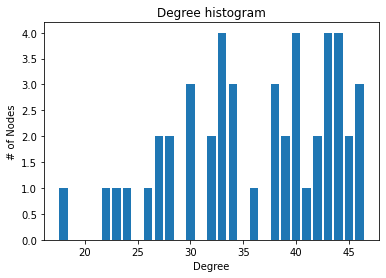

In [38]:
fig, ax = plt.subplots()

ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Degree histogram")
ax.set_xlabel("Degree")
ax.set_ylabel("# of Nodes")

ValueError: Invalid RGBA argument: 347353

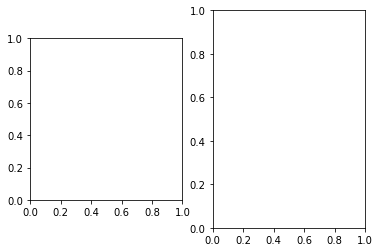

In [45]:
import numpy as np
fig, ax = plt.subplots(1, 2)

alldata = np.concatenate((salidas, entradas))
vmax = alldata.max()
vmin = alldata.min()

mapa.plot(ax = ax[0], color = entradas, vmin = vmin, vmax=vmax, cmap ="autumn_r")

#nx.draw(G, ax=ax[0], pos = pos, labels = labels, node_color = salidas, font_size=14, font_color="k", cmap ="autumn_r",
       #vmin = vmin, vmax=vmax)
nx.draw(G, ax=ax[1], pos = pos, labels = labels, node_color = entradas, font_size=14, font_color="k", cmap ="autumn_r",
       vmin = vmin, vmax=vmax)

fig.set_size_inches(14, 8)
sm = plt.cm.ScalarMappable(cmap="autumn_r", norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, fraction = 0.04)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label(label='\nViajes realizados', fontsize=18)

ax[0].annotate('(A)', xy=(20, 460), xycoords = 'axes points', fontsize = 15)
ax[1].annotate('(B)', xy=(20, 460), xycoords = 'axes points', fontsize = 15)

fig.tight_layout(pad = 0.5)
plt.show()